In [ ]:
import pandas as pd
import re
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('ScrappingKRL.csv')
df = pd.read_csv('/content/drive/MyDrive/KRL.csv')
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1991117707971051773,Wed Nov 19 23:59:36 +0000 2025,0,@IdkGiannn Ohiya siii enak opentrip. Kalau aku...,1991295323499819110,NaN,IdkGiannn,in,NaN,0,0,0,https://x.com/undefined/status/199129532349981...,1336921620091346945,NaN
1,1991291507912110267,Wed Nov 19 23:44:26 +0000 2025,0,mau liburan nyantai emang enaknya naik gopar. ...,1991291507912110267,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199129150791211...,1685807200437166080,NaN
2,1991282302601818149,Wed Nov 19 23:07:51 +0000 2025,0,Untung lgsg mutusin otw naik krl klo ttp motor...,1991282302601818149,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199128230260181...,1368158733214261252,NaN
3,1991277789794955620,Wed Nov 19 22:49:55 +0000 2025,0,mana mutual zombie yg jam segini udah naik krl,1991277789794955620,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/199127778979495...,1788264130266435584,NaN
4,1991275729141789173,Wed Nov 19 22:41:44 +0000 2025,0,Bagi banyak warga Jabodetabek KRL telah menjad...,1991275729141789173,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199127572914178...,1604473330936909824,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,1989279866299326889,Fri Nov 14 17:50:39 +0000 2025,0,@tubirfess ya lu kalo gamau kebauan jangan nai...,1989390536432824516,NaN,tubirfess,in,NaN,0,0,0,https://x.com/undefined/status/198939053643282...,1910247363144454144,NaN
774,1989253914315886905,Fri Nov 14 17:43:26 +0000 2025,0,Tapi yg paling effort waktu zene sih gue prakt...,1989388719133266127,NaN,gomienight,in,NaN,0,1,0,https://x.com/undefined/status/198938871913326...,1265641190864510977,NaN
775,1989387313219256753,Fri Nov 14 17:37:51 +0000 2025,0,Mindset gw kalo naik krl adalah lo bayar cuman...,1989387313219256753,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198938731321925...,1895038312613871616,NaN
776,1989279866299326889,Fri Nov 14 17:36:39 +0000 2025,6,@tubirfess Kak dulu ga pernah naik krl ya? Wkt...,1989387011594359299,NaN,tubirfess,in,NaN,0,2,0,https://x.com/undefined/status/198938701159435...,1262533495592640513,NaN


In [ ]:
df = df[['full_text']]
df

,full_text
0,@IdkGiannn Ohiya siii enak opentrip. Kalau aku...
1,mau liburan nyantai emang enaknya naik gopar. ...
2,Untung lgsg mutusin otw naik krl klo ttp motor...
3,mana mutual zombie yg jam segini udah naik krl
4,Bagi banyak warga Jabodetabek KRL telah menjad...
...,...
773,@tubirfess ya lu kalo gamau kebauan jangan nai...
774,Tapi yg paling effort waktu zene sih gue prakt...
775,Mindset gw kalo naik krl adalah lo bayar cuman...
776,@tubirfess Kak dulu ga pernah naik krl ya? Wkt...


# Preprocessing 1

## punctuation

In [ ]:
import re

def normalize_basic(text):
    text = str(text).lower()                             # ubah ke huruf kecil
    text = re.sub(r'@\w+', '', text)                     # hapus mention
    text = re.sub(r'(?:http?://|https?://|www\.)\S+', '', text) # hapus url
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)          # hapus simbol aneh
    text = re.sub(r'(.)\1{2,}', r'\1', text)             # ubah huruf berulang: "heellooo" -> "helo"
    text = re.sub(r'[^\w\s]', ' ', text)                 # hapus tanda baca, tapi simpan spasi
    text = re.sub(r'\s+', ' ', text).strip()             # rapikan spasi berlebih
    return text
df['punctuation_text'] = df['full_text'].apply(normalize_basic)
df_punct_view = df[['punctuation_text']]
df_punct_view

/tmp/ipython-input-1461801127.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['punctuation_text'] = df['full_text'].apply(normalize_basic)


,punctuation_text
0,ohiya si enak opentrip kalau aku rencananya na...
1,mau liburan nyantai emang enaknya naik gopar m...
2,untung lgsg mutusin otw naik krl klo ttp motor...
3,mana mutual zombie yg jam segini udah naik krl
4,bagi banyak warga jabodetabek krl telah menjad...
...,...
773,ya lu kalo gamau kebauan jangan naik transum n...
774,tapi yg paling effort waktu zene sih gue prakt...
775,mindset gw kalo naik krl adalah lo bayar cuman...
776,kak dulu ga pernah naik krl ya wktu belinya ma...


## Normalize

In [ ]:
!pip install deep-translator

In [ ]:
import re
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='en', target='id')

def translate_sentence(text):
    text = str(text)
    try:
        # translate seluruh kalimat sekaligus
        translated_text = translator.translate(text)
    except:
        translated_text = text
    return translated_text

# Terapkan ke dataframe
df['translated'] = df['punctuation_text'].apply(translate_sentence)
df_translated_view = df[['punctuation_text', 'translated']]

df_translated_view


/tmp/ipython-input-645472248.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['translated'] = df['punctuation_text'].apply(translate_sentence)


,punctuation_text,translated
0,ohiya si enak opentrip kalau aku rencananya na...,ohiya si enak opentrip kalau aku merencanakan ...
1,mau liburan nyantai emang enaknya naik gopar m...,mau liburan nyantai emang enaknya naik gopar m...
2,untung lgsg mutusin otw naik krl klo ttp motor...,untung lgsg mutusin otw naik krl klo ttp motor...
3,mana mutual zombie yg jam segini udah naik krl,mana mutual zombie yg jam segini udah naik krl
4,bagi banyak warga jabodetabek krl telah menjad...,bagi banyak warga jabodetabek krl telah menjad...
...,...,...
773,ya lu kalo gamau kebauan jangan naik transum n...,ya lu kalo gamau kebauan jangan naik transum n...
774,tapi yg paling effort waktu zene sih gue prakt...,tapi yg paling usaha waktu zene sih gue prakte...
775,mindset gw kalo naik krl adalah lo bayar cuman...,pola pikir gw kalo naik krl adalah lo bayar cu...
776,kak dulu ga pernah naik krl ya wktu belinya ma...,kak dulu ga pernah naik krl ya wktu belinya ma...


In [ ]:
df_translated_view.to_csv('translated.csv', index=False)

In [ ]:
# kamus slang
kamus = pd.read_csv('/content/drive/MyDrive/colloquial-indonesian-lexicon.csv', usecols=['slang', 'formal'])
kamus_dict = dict(zip(kamus['slang'], kamus['formal']))

kamus

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa
...,...,...
15001,gataunya,enggak taunya
15002,gtau,enggak tau
15003,gatau,enggak tau
15004,fans2,fan-fan


In [ ]:
def normalize_slang(text):
    words = text.lower().split()
    return ' '.join([kamus_dict.get(w, w) for w in words])

df['normalized'] = df['translated'].apply(normalize_slang)
df_normalized_view = df[['translated', 'normalized']]
df_normalized_view

/tmp/ipython-input-117412598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized'] = df['translated'].apply(normalize_slang)


,translated,normalized
0,ohiya si enak opentrip kalau aku merencanakan ...,ohiya sih enak opentrip kalau aku merencanakan...
1,mau liburan nyantai emang enaknya naik gopar m...,mau liburan nyantai memang enaknya naik gopar ...
2,untung lgsg mutusin otw naik krl klo ttp motor...,untung langsung memutuskan otw naik krl kalo t...
3,mana mutual zombie yg jam segini udah naik krl,mana mutual zombie yang jam segini sudah naik krl
4,bagi banyak warga jabodetabek krl telah menjad...,bagi banyak warga jabodetabek krl telah menjad...
...,...,...
773,ya lu kalo gamau kebauan jangan naik transum n...,ya lu kalo enggak mau kebauan jangan naik tran...
774,tapi yg paling usaha waktu zene sih gue prakte...,tapi yang paling usaha waktu zene sih gue prak...
775,pola pikir gw kalo naik krl adalah lo bayar cu...,pola pikir gue kalo naik krl adalah lo bayar c...
776,kak dulu ga pernah naik krl ya wktu belinya ma...,kak dulu enggak pernah naik krl ya waktu belin...


In [ ]:
df_normalized_view.to_csv('normalized.csv', index=False)

# Labeling

In [ ]:
from transformers import pipeline

In [ ]:
sentiment_pipe = pipeline(
    "sentiment-analysis",
    model="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa",
    tokenizer="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
df['hf_label'] = df['normalized'].apply(lambda x: sentiment_pipe(x)[0]['label'])
df['hf_score'] = df['normalized'].apply(lambda x: sentiment_pipe(x)[0]['score'])
df_view = df[['normalized', 'hf_label', 'hf_score']]
df_view

/tmp/ipython-input-898805312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hf_label'] = df['normalized'].apply(lambda x: sentiment_pipe(x)[0]['label'])
/tmp/ipython-input-898805312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hf_score'] = df['normalized'].apply(lambda x: sentiment_pipe(x)[0]['score'])


,normalized,hf_label,hf_score
0,ohiya sih enak opentrip kalau aku merencanakan...,Positive,0.999579
1,mau liburan nyantai memang enaknya naik gopar ...,Positive,0.998839
2,untung langsung memutuskan otw naik krl kalo t...,Positive,0.998958
3,mana mutual zombie yang jam segini sudah naik krl,Negative,0.999824
4,bagi banyak warga jabodetabek krl telah menjad...,Positive,0.958298
...,...,...,...
773,ya lu kalo enggak mau kebauan jangan naik tran...,Negative,0.998076
774,tapi yang paling usaha waktu zene sih gue prak...,Neutral,0.795423
775,pola pikir gue kalo naik krl adalah lo bayar c...,Negative,0.887752
776,kak dulu enggak pernah naik krl ya waktu belin...,Neutral,0.999091


In [ ]:
print("HuggingFace label counts:")
print(df['hf_label'].value_counts())

HuggingFace label counts:
hf_label
Negative    478
Neutral     191
Positive    109
Name: count, dtype: int64


In [ ]:
# membaca file labeling final dari drive
df = pd.read_csv('/content/drive/MyDrive/LABELING FIX.csv')
df

,normalized,hf_final,hf_score
0,ohiya sih enak opentrip kalau aku merencanakan...,Positive,9.995.786.547.660.820
1,mau liburan nyantai memang enaknya naik gopar ...,Positive,9.988.386.034.965.510
2,untung langsung memutuskan otw naik krl kalo t...,Positive,9.989.577.531.814.570
3,mana mutual zombie yang jam segini sudah naik krl,Positive,9.998.242.259.025.570
4,bagi banyak warga jabodetabek krl telah menjad...,Positive,9.582.975.506.782.530
...,...,...,...
773,ya lu kalo enggak mau kebauan jangan naik tran...,Negative,9.980.762.004.852.290
774,tapi yang paling usaha waktu zene sih gue prak...,Neutral,7.954.233.884.811.400
775,pola pikir gue kalo naik krl adalah lo bayar c...,Neutral,8.877.518.773.078.910
776,kak dulu enggak pernah naik krl ya waktu belin...,Neutral,9.990.907.907.485.960


In [ ]:
# menghitung jumlah sentimen neutral, negatif, dan positif
print("Label counts:")
print(df['hf_final'].value_counts())

Label counts:
hf_final
Negative    399
Neutral     218
Positive    161
Name: count, dtype: int64


# Preprocessing 2

## Tokenizer (memisah kalimat menjadi tiap kata)

In [ ]:
df['tokens'] = df['normalized'].apply(lambda x: x.split())
df['tokens'] = df['tokens'].apply(lambda x: [t for t in x if len(t) > 1])
df_tokenized_view = df[['normalized', 'tokens']]
df_tokenized_view

,normalized,tokens
0,ohiya sih enak opentrip kalau aku merencanakan...,"[ohiya, sih, enak, opentrip, kalau, aku, meren..."
1,mau liburan nyantai memang enaknya naik gopar ...,"[mau, liburan, nyantai, memang, enaknya, naik,..."
2,untung langsung memutuskan otw naik krl kalo t...,"[untung, langsung, memutuskan, otw, naik, krl,..."
3,mana mutual zombie yang jam segini sudah naik krl,"[mana, mutual, zombie, yang, jam, segini, suda..."
4,bagi banyak warga jabodetabek krl telah menjad...,"[bagi, banyak, warga, jabodetabek, krl, telah,..."
...,...,...
773,ya lu kalo enggak mau kebauan jangan naik tran...,"[ya, lu, kalo, enggak, mau, kebauan, jangan, n..."
774,tapi yang paling usaha waktu zene sih gue prak...,"[tapi, yang, paling, usaha, waktu, zene, sih, ..."
775,pola pikir gue kalo naik krl adalah lo bayar c...,"[pola, pikir, gue, kalo, naik, krl, adalah, lo..."
776,kak dulu enggak pernah naik krl ya waktu belin...,"[kak, dulu, enggak, pernah, naik, krl, ya, wak..."


## Stopword

In [ ]:
# melakukan stopword manual dari kolom tokens
import ast
manual_stopwords = [
    'yang', 'dan', 'di', 'ke', 'dari', 'itu', 'ini',
    'untuk', 'pada', 'dengan', 'karena', 'bahwa', 'saat',
    'ada', 'tidak', 'ya', 'nih', 'loh', 'sih', 'dong', 'agar', 'atau',
    'sehingga', 'telah', 'sudah', 'tersebut', 'nya', 'lah', 'pun',
    'seperti', 'sebuah', 'seorang', 'akan', 'para', 'dah', 'kek', 'jg', 'juga',
    'udah', 'udahh', 'belum', 'blm',
    'ngapa', 'ngapain', 'gimana', 'kenapa'
]

df['stopwords'] = df['tokens'].apply(lambda x: [t for t in x if t not in manual_stopwords])
df_stopword_view = df[['tokens', 'stopwords']]
df_stopword_view


,tokens,stopwords
0,"[ohiya, sih, enak, opentrip, kalau, aku, meren...","[ohiya, enak, opentrip, kalau, aku, merencanak..."
1,"[mau, liburan, nyantai, memang, enaknya, naik,...","[mau, liburan, nyantai, memang, enaknya, naik,..."
2,"[untung, langsung, memutuskan, otw, naik, krl,...","[untung, langsung, memutuskan, otw, naik, krl,..."
3,"[mana, mutual, zombie, yang, jam, segini, suda...","[mana, mutual, zombie, jam, segini, naik, krl]"
4,"[bagi, banyak, warga, jabodetabek, krl, telah,...","[bagi, banyak, warga, jabodetabek, krl, menjad..."
...,...,...
773,"[ya, lu, kalo, enggak, mau, kebauan, jangan, n...","[lu, kalo, enggak, mau, kebauan, jangan, naik,..."
774,"[tapi, yang, paling, usaha, waktu, zene, sih, ...","[tapi, paling, usaha, waktu, zene, gue, prakte..."
775,"[pola, pikir, gue, kalo, naik, krl, adalah, lo...","[pola, pikir, gue, kalo, naik, krl, adalah, lo..."
776,"[kak, dulu, enggak, pernah, naik, krl, ya, wak...","[kak, dulu, enggak, pernah, naik, krl, waktu, ..."


## Stemming (Merubah Kata menjadi kata dasar)

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def apply_stemming(tokens):
  if isinstance(tokens, str):
    tokens = tokens.split()
  stemmed_tokens = [stemmer.stem(word) for word in tokens]
  return ' '.join(stemmed_tokens)

df['stemmed'] = df['stopwords'].apply(apply_stemming)
df_stemmed_view = df[['stopwords', 'stemmed']]
df_stemmed_view

,stopwords,stemmed
0,"[ohiya, enak, opentrip, kalau, aku, merencanak...",ohiya enak opentrip kalau aku rencana naik krl...
1,"[mau, liburan, nyantai, memang, enaknya, naik,...",mau libur nyantai memang enak naik gopar mau l...
2,"[untung, langsung, memutuskan, otw, naik, krl,...",untung langsung putus otw naik krl kalo tetap ...
3,"[mana, mutual, zombie, jam, segini, naik, krl]",mana mutual zombie jam gin naik krl
4,"[bagi, banyak, warga, jabodetabek, krl, menjad...",bagi banyak warga jabodetabek krl jadi sahabat...
...,...,...
773,"[lu, kalo, enggak, mau, kebauan, jangan, naik,...",lu kalo enggak mau bau jangan naik transum nai...
774,"[tapi, paling, usaha, waktu, zene, gue, prakte...",tapi paling usaha waktu zene gue praktek sampa...
775,"[pola, pikir, gue, kalo, naik, krl, adalah, lo...",pola pikir gue kalo naik krl adalah lo bayar c...
776,"[kak, dulu, enggak, pernah, naik, krl, waktu, ...",kak dulu enggak pernah naik krl waktu beli mas...


# Word cloud

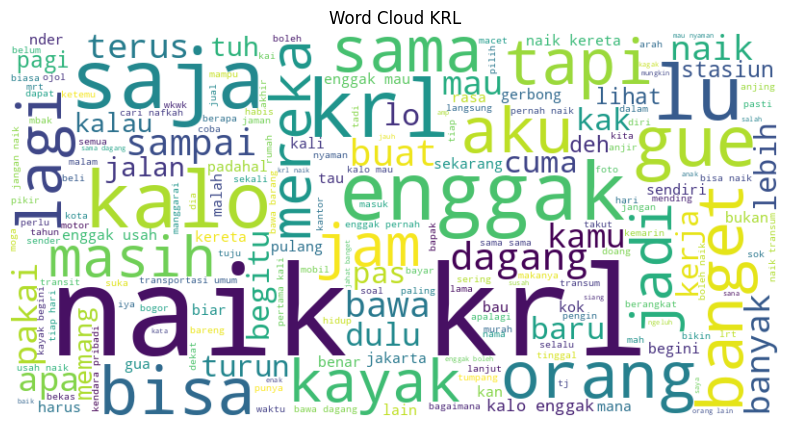

In [ ]:
#Word Cloud KRL
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['stemmed'])

wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud KRL')
plt.show()

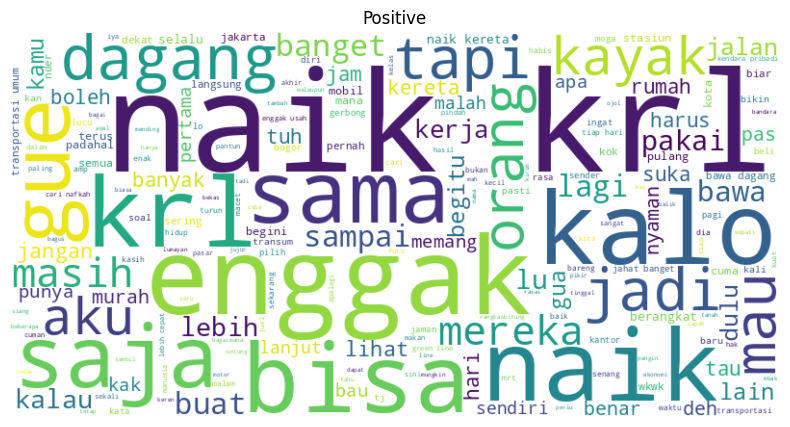

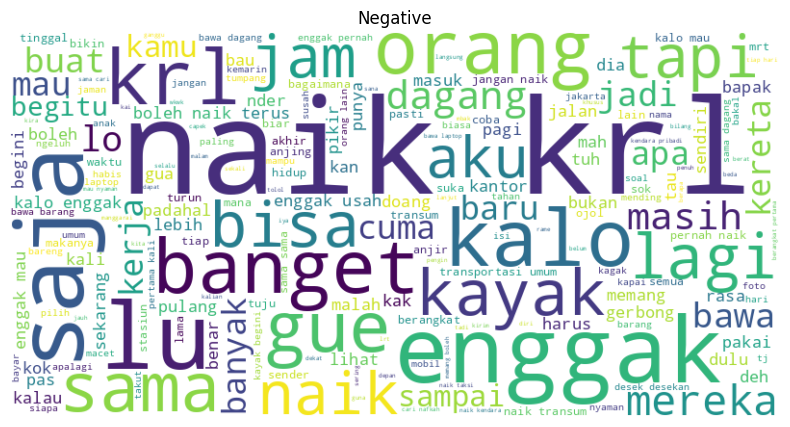

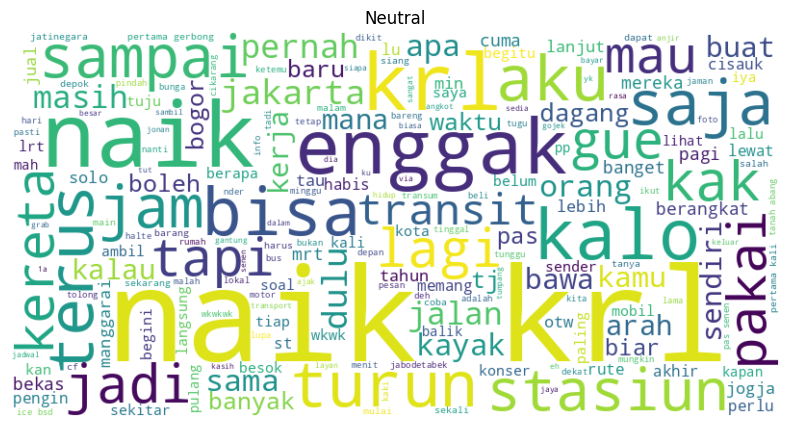

In [ ]:
# Word cloud per sentimen
for label in df['hf_final'].unique():
    text = ' '.join(df[df['hf_final'] == label]['stemmed'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.title(label)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


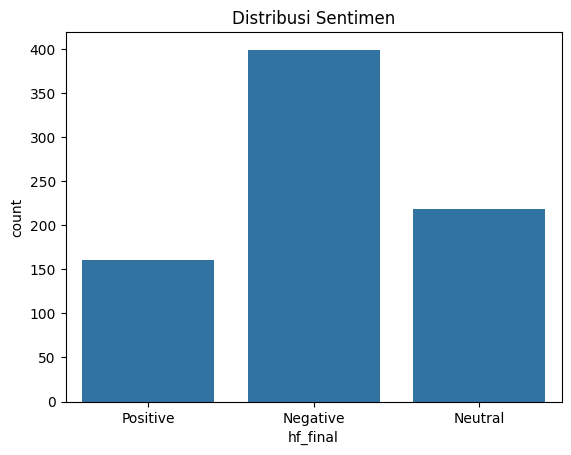

In [ ]:
# distribusi sentimen
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='hf_final', data=df)
plt.title('Distribusi Sentimen')
plt.show()

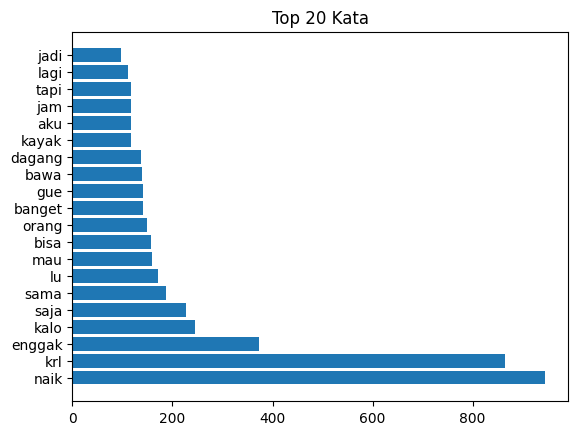

In [ ]:
# top 20 kata
from collections import Counter

all_words = sum(df['stemmed'].apply(lambda x: x.split()), [])
word_freq = Counter(all_words).most_common(20)

words, freqs = zip(*word_freq)
plt.barh(words, freqs)
plt.title("Top 20 Kata")
plt.show()

# Feature Engineering

## TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [ ]:
text = df['stopwords'].astype(str)
tfidf = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1,2),
    stop_words=None
)

X_tfidf = tfidf.fit_transform(text)


In [ ]:
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)

tfidf_df

,10,12,17,1a,20,24,30,43,abang,ac,...,whoosh,wkwk,wkwkw,wkwkwk,wkwkwkw,woy,yakin,yaudah,ye,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split Data (data train dan data testing)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = tfidf_df
y = df['hf_final']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print('ukuran data latih: ', X_train.shape)
print('ukuran data uji: ', X_test.shape)

ukuran data latih:  (622, 1000)
ukuran data uji:  (156, 1000)


# Klasifikasi Metode Naive Bayes

## modeling

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi dan latih model Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## Training data

In [ ]:
y_pred_train = nb_classifier.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Akurasi pada data training:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Akurasi pada data training: 0.7202572347266881
              precision    recall  f1-score   support

    Negative       0.66      0.99      0.80       319
     Neutral       0.88      0.59      0.71       174
    Positive       1.00      0.22      0.36       129

    accuracy                           0.72       622
   macro avg       0.85      0.60      0.62       622
weighted avg       0.79      0.72      0.68       622



# Evaluasi

In [ ]:
y_pred = nb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Akurasi pada data testing:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi pada data testing: 0.6153846153846154
              precision    recall  f1-score   support

    Negative       0.60      0.94      0.73        80
     Neutral       0.68      0.43      0.53        44
    Positive       1.00      0.06      0.12        32

    accuracy                           0.62       156
   macro avg       0.76      0.48      0.46       156
weighted avg       0.70      0.62      0.55       156



# cofussion matrix

<Figure size 600x400 with 0 Axes>

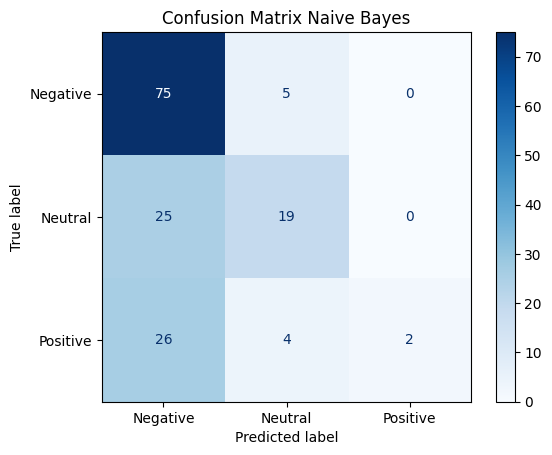

In [ ]:
# confussion matrix data testing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Prediksi data training (atau testing)
y_pred = nb_classifier.predict(X_test)   # ganti X_train jadi X_test kalau mau lihat testing

# 2. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])

# 3. Tampilkan sebagai heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(6, 4))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix Naive Bayes")
plt.show()

<Figure size 600x400 with 0 Axes>

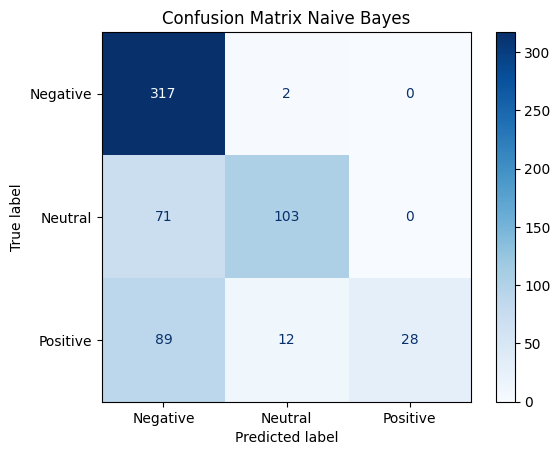

In [ ]:
# confussion matrix data training
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Prediksi data training (atau testing)
y_pred = nb_classifier.predict(X_train)   # ganti X_train jadi X_test kalau mau lihat testing

# 2. Buat confusion matrix
cm = confusion_matrix(y_train, y_pred, labels=['Negative', 'Neutral', 'Positive'])

# 3. Tampilkan sebagai heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(6, 4))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix Naive Bayes")
plt.show()

# Fine Tuning

Data tweet KRL dilatih kembali dengan model BERT agar model lebih memahami pola bahasa dan sentimen khusus pada konteks KRL

## install dan impor

In [ ]:
!pip install transformers datasets torch accelerate

In [ ]:
!pip install --upgrade transformers datasets torch accelerate

In [ ]:
import datasets
import httpx
print(f"datasets version: {datasets.__version__}")
print(f"httpx version: {httpx.__version__}")

datasets version: 4.4.1
httpx version: 0.28.1


In [ ]:
# impor
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch.nn as nn

## load data & label

In [ ]:
# contoh: load CSV KRL yang sudah berisi kolom 'normalized' (teks) dan 'hf_final' (label final)
df = pd.read_csv('/content/drive/MyDrive/LABELING FIX.csv')  # sesuaikan path

# pastikan nggak ada NaN di teks / label
df = df.dropna(subset=['normalized', 'hf_final']).reset_index(drop=True)

# lihat distribusi label
print(df['hf_final'].value_counts())

# encode label -> id (0..n-1)
le = LabelEncoder()
df['label_id'] = le.fit_transform(df['hf_final'])
label2id = {l:i for i,l in enumerate(le.classes_)}
id2label = {i:l for l,i in label2id.items()}
print("label2id:", label2id)


hf_final
Negative    399
Neutral     218
Positive    161
Name: count, dtype: int64
label2id: {'Negative': 0, 'Neutral': 1, 'Positive': 2}


## split training & testing

In [ ]:
train_df, test_df = train_test_split(
    df[['normalized','label_id']],
    test_size=0.2,
    stratify=df['label_id'],
    random_state=42
)

print("train size:", len(train_df), "test size:", len(test_df))


train size: 622 test size: 156


## hitung class weight

In [ ]:
# compute freq on training labels
counts = train_df['label_id'].value_counts().sort_index()
print("class counts (train):", counts.to_dict())

# class weights = inverse frequency
# convert to tensor on device later
class_freq = counts.values.astype(np.float32)
class_weights = 1.0 / class_freq
class_weights = class_weights / class_weights.sum() * len(class_freq)  # normalisasi (opsional)
class_weights = torch.tensor(class_weights, dtype=torch.float)
print("class weights:", class_weights)


class counts (train): {0: 319, 1: 174, 2: 129}
class weights: tensor([0.5654, 1.0365, 1.3981])


## hugging face dataset

In [ ]:
model_name = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# convert ke Dataset dari pandas
dataset = Dataset.from_pandas(train_df.rename(columns={'normalized':'text','label_id':'labels'}))
dataset_test = Dataset.from_pandas(test_df.rename(columns={'normalized':'text','label_id':'labels'}))


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

## tokenizer

In [ ]:
def tokenize_fn(batch):
    return tokenizer(batch['text'], truncation=True, padding='max_length', max_length=128)

tokenized_train = dataset.map(tokenize_fn, batched=True)
tokenized_test = dataset_test.map(tokenize_fn, batched=True)

# buang kolom teks asli agar Trainer pakai tensors
tokenized_train = tokenized_train.remove_columns([c for c in tokenized_train.column_names if c not in ['input_ids','attention_mask','labels']])
tokenized_test = tokenized_test.remove_columns([c for c in tokenized_test.column_names if c not in ['input_ids','attention_mask','labels']])

tokenized_train.set_format("torch")
tokenized_test.set_format("torch")

Map:   0%|          | 0/622 [00:00<?, ? examples/s]

Map:   0%|          | 0/156 [00:00<?, ? examples/s]

## load model

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

num_labels = len(label2id)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## custom trainer

In [ ]:
# Custom Trainer: override compute_loss to include class weights
class WeightedTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights.to(self.model.device) if class_weights is not None else None

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=self.class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

## training argument & trainer start

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./indobert-krl",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    fp16=torch.cuda.is_available()
)

In [ ]:
# compute_metrics (gunakan sklearn)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted', zero_division=0)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}


In [ ]:
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    processing_class=tokenizer,
    compute_metrics=compute_metrics,
    class_weights=class_weights
)

# Mulai train
trainer.train()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 3


wandb: You chose "Don't visualize my results"


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.859438,0.544872,0.665991,0.544872,0.557248
2,0.939100,0.819647,0.641026,0.665509,0.641026,0.638139
3,0.600800,0.812647,0.679487,0.676362,0.679487,0.676607
4,0.346800,0.851546,0.692308,0.698906,0.692308,0.692811


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=156, training_loss=0.6156720152268043, metrics={'train_runtime': 3957.5811, 'train_samples_per_second': 0.629, 'train_steps_per_second': 0.039, 'total_flos': 163656545826816.0, 'train_loss': 0.6156720152268043, 'epoch': 4.0})

## evaluasi

In [ ]:
metrics = trainer.evaluate(tokenized_test)
print("Trainer evaluation metrics (test set):")
print(metrics)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Trainer evaluation metrics (test set):
{'eval_loss': 0.8515463471412659, 'eval_accuracy': 0.6923076923076923, 'eval_precision': 0.6989056569093087, 'eval_recall': 0.6923076923076923, 'eval_f1': 0.6928105354583922, 'eval_runtime': 58.246, 'eval_samples_per_second': 2.678, 'eval_steps_per_second': 0.086, 'epoch': 4.0}


## Prediksi data testing

In [ ]:
preds_output = trainer.predict(tokenized_test)

y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = preds_output.label_ids

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Akurasi pada data testing:", accuracy)

Akurasi pada data testing: 0.6923076923076923


## Classification Report

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report (test set):")
print(classification_report(
    y_true,
    y_pred,
    target_names=list(label2id.keys())  # nama label sesuai mapping
))

Classification Report (test set):
              precision    recall  f1-score   support

    Negative       0.78      0.70      0.74        80
     Neutral       0.64      0.77      0.70        44
    Positive       0.58      0.56      0.57        32

    accuracy                           0.69       156
   macro avg       0.67      0.68      0.67       156
weighted avg       0.70      0.69      0.69       156



## confussion matrix

Confusion Matrix:
 [[56 14 10]
 [ 7 34  3]
 [ 9  5 18]]


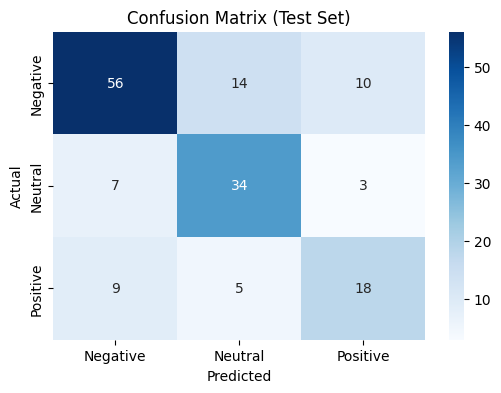

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Visualisasi heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label2id.keys()),
            yticklabels=list(label2id.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [ ]:
# simpan model & tokenizer
trainer.save_model("./indobert-krl-finetuned")
tokenizer.save_pretrained("./indobert-krl-finetuned")

('./indobert-krl-finetuned/tokenizer_config.json',
 './indobert-krl-finetuned/special_tokens_map.json',
 './indobert-krl-finetuned/vocab.txt',
 './indobert-krl-finetuned/added_tokens.json',
 './indobert-krl-finetuned/tokenizer.json')

In [ ]:
import numpy as np

np.save("krl_y_true.npy", y_true)
np.save("krl_y_pred.npy", y_pred)

print("File berhasil disimpan!")


File berhasil disimpan!


In [ ]:
#simpan file csv krl final
df.to_csv('krl_final.csv', index=False)

Perbandingan metode NB dan BERT

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Naive Bayes results (from previous execution)
y_true_nb = y_test # The y_test is still available from the Naive Bayes split
y_pred_nb = nb_classifier.predict(X_test)

print("**Naive Bayes Classification Report (Test Set):**")
print(classification_report(y_true_nb, y_pred_nb))
print(f"Naive Bayes Accuracy: {accuracy_score(y_true_nb, y_pred_nb):.4f}\n")

# Fine-tuned BERT results (from previous execution)
y_true_bert = np.load("krl_y_true.npy")
y_pred_bert = np.load("krl_y_pred.npy")

# Ensure label2id is available, or redefine if necessary
# Assuming label2id is still in scope from previous execution
# If not, you might need to re-run the `label2id` cell or load it.
if 'label2id' not in globals():
    print("label2id not found, attempting to reconstruct...")
    # This is a fallback, ideally label2id would persist or be saved/loaded.
    unique_labels = sorted(list(set(df['hf_final'].unique())))
    le = LabelEncoder()
    le.fit(unique_labels)
    label2id = {l:i for i,l in enumerate(le.classes_)}
    id2label = {i:l for l,i in label2id.items()}

print("**Fine-tuned BERT Classification Report (Test Set):**")
print(classification_report(
    y_true_bert,
    y_pred_bert,
    target_names=list(label2id.keys())
))
print(f"Fine-tuned BERT Accuracy: {accuracy_score(y_true_bert, y_pred_bert):.4f}")

**Naive Bayes Classification Report (Test Set):**
              precision    recall  f1-score   support

    Negative       0.60      0.94      0.73        80
     Neutral       0.68      0.43      0.53        44
    Positive       1.00      0.06      0.12        32

    accuracy                           0.62       156
   macro avg       0.76      0.48      0.46       156
weighted avg       0.70      0.62      0.55       156

Naive Bayes Accuracy: 0.6154

**Fine-tuned BERT Classification Report (Test Set):**
              precision    recall  f1-score   support

    Negative       0.78      0.70      0.74        80
     Neutral       0.64      0.77      0.70        44
    Positive       0.58      0.56      0.57        32

    accuracy                           0.69       156
   macro avg       0.67      0.68      0.67       156
weighted avg       0.70      0.69      0.69       156

Fine-tuned BERT Accuracy: 0.6923


 Perbandingan Confusion Matrix

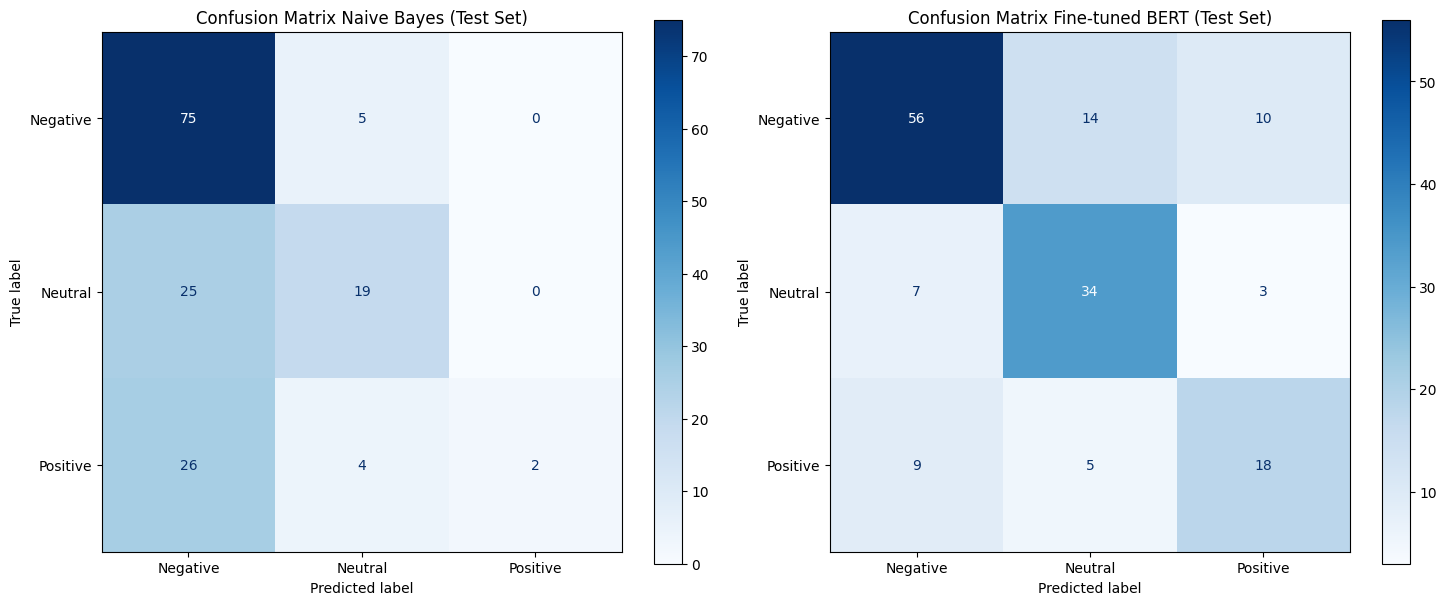

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Naive Bayes Confusion Matrix
cm_nb = confusion_matrix(y_true_nb, y_pred_nb, labels=['Negative', 'Neutral', 'Positive'])
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb,
                                 display_labels=['Negative', 'Neutral', 'Positive'])
disp_nb.plot(cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix Naive Bayes (Test Set)")

# Fine-tuned BERT Confusion Matrix
cm_bert = confusion_matrix(y_true_bert, y_pred_bert)
disp_bert = ConfusionMatrixDisplay(confusion_matrix=cm_bert,
                                   display_labels=list(label2id.keys()))
disp_bert.plot(cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix Fine-tuned BERT (Test Set)")

plt.tight_layout()
plt.show()

# Perbandingan 2 metode

In [ ]:
y_true_nb = y_test         # label sebenarnya dari test KRL
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
y_true_bert = np.load("krl_y_true.npy")
y_pred_bert = np.load("krl_y_pred.npy")

In [ ]:
id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}
label_names = ["Negative", "Neutral", "Positive"]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("=== Naive Bayes (KRL) ===")
print(classification_report(y_true_nb, y_pred_nb))
print("Accuracy NB:", accuracy_score(y_true_nb, y_pred_nb))

print("\n=== Fine-tuned BERT (KRL) ===")
print(classification_report(y_true_bert, y_pred_bert))
print("Accuracy BERT:", accuracy_score(y_true_bert, y_pred_bert))

=== Naive Bayes (KRL) ===
              precision    recall  f1-score   support

    Negative       0.60      0.94      0.73        80
     Neutral       0.68      0.43      0.53        44
    Positive       1.00      0.06      0.12        32

    accuracy                           0.62       156
   macro avg       0.76      0.48      0.46       156
weighted avg       0.70      0.62      0.55       156

Accuracy NB: 0.6153846153846154

=== Fine-tuned BERT (KRL) ===
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        80
           1       0.64      0.77      0.70        44
           2       0.58      0.56      0.57        32

    accuracy                           0.69       156
   macro avg       0.67      0.68      0.67       156
weighted avg       0.70      0.69      0.69       156

Accuracy BERT: 0.6923076923076923


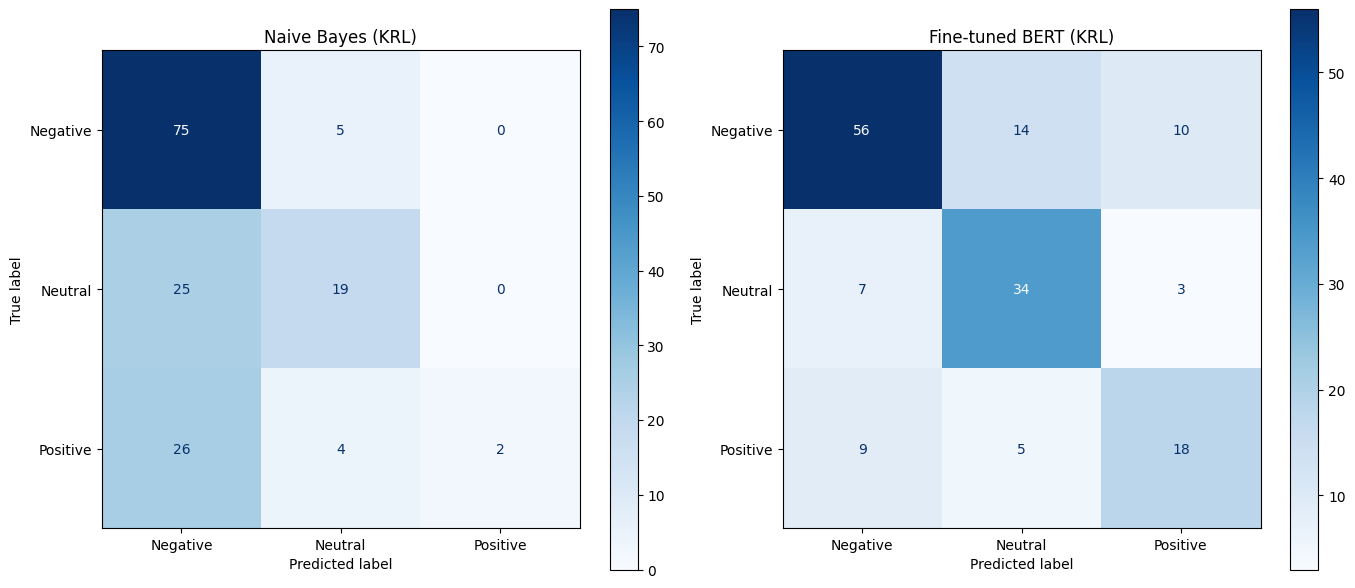

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ["Negative", "Neutral", "Positive"]

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# NB
cm_nb = confusion_matrix(y_true_nb, y_pred_nb, labels=labels)
ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=labels).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Naive Bayes (KRL)")

# BERT
y_true_bert_str = [id2label[label_id] for label_id in y_true_bert]
y_pred_bert_str = [id2label[label_id] for label_id in y_pred_bert]

cm_bert = confusion_matrix(y_true_bert_str, y_pred_bert_str, labels=labels)
ConfusionMatrixDisplay(confusion_matrix=cm_bert,
                       display_labels=labels).plot(ax=axes[1], cmap="Blues")
axes[1].set_title("Fine-tuned BERT (KRL)")

plt.tight_layout()
plt.show()

ya allah jujur takut banget bantuin aku  ya allah